In [1]:
#Import required lobraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read in the insurance dataset
insurance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#One-hot-encode
insurance_one_hot = pd.get_dummies(insurance)

In [6]:
#Create X and y values
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [7]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
#Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
|  | |   |

In [14]:
#set random seed
tf.random.set_seed(42)
#Create a model
insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])
#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
#Check the results on the test data
insurance_model.evaluate(X_test, y_test)

In [12]:
#Check the results on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [15]:
pred = insurance_model.predict(X_test)

In [17]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [16]:
pred

array([[12541.166 ],
       [ 8981.749 ],
       [20281.945 ],
       [12997.792 ],
       [ 7667.256 ],
       [ 9048.03  ],
       [ 3970.31  ],
       [16986.562 ],
       [ 6553.7   ],
       [13931.824 ],
       [11841.377 ],
       [11257.752 ],
       [ 7640.4194],
       [17186.02  ],
       [19633.303 ],
       [16880.6   ],
       [14148.9795],
       [16439.781 ],
       [12374.691 ],
       [14375.43  ],
       [ 7863.217 ],
       [11745.962 ],
       [ 3963.8625],
       [ 5556.0513],
       [14307.78  ],
       [14338.122 ],
       [15751.809 ],
       [ 7908.605 ],
       [13147.357 ],
       [ 3969.0344],
       [11877.595 ],
       [14943.573 ],
       [ 5069.9224],
       [ 8432.175 ],
       [ 6402.6353],
       [11912.932 ],
       [ 4998.167 ],
       [11293.194 ],
       [17304.564 ],
       [13189.915 ],
       [ 6431.8228],
       [ 5454.861 ],
       [15130.4   ],
       [15198.897 ],
       [ 9324.264 ],
       [15607.694 ],
       [ 5837.816 ],
       [ 7023

In [20]:
#set random seed
tf.random.set_seed(42)
#Create a model
insurance_model2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])
#2. Compile the model
insurance_model2.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.Adam(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
insurance_model2.fit(X_train,y_train,epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0815 - mae:

In [21]:
#Check the results on the test data
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [22]:
#set random seed
tf.random.set_seed(42)
#Create a model
insurance_model2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])
#2. Compile the model
insurance_model2.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.Adam(), #stochastic gradient descent
              metrics=["mae"])

#Fit the model
history = insurance_model2.fit(X_train,y_train,epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0815 - mae:

In [23]:
#Check the results on the test data
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3494.5291 - mae: 3494.5291


[3494.529052734375, 3494.529052734375]

Text(0.5, 0, 'epochs')

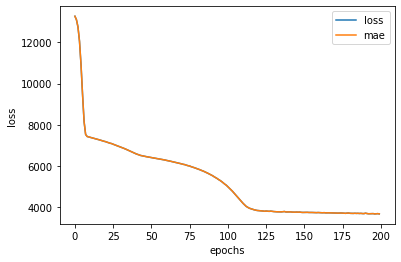

In [24]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")